In [4]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
path = os.path.expanduser('~/Data_607_Final_Project') # Your file must have the same name.
os.chdir(path) # Change this to your working directory
train = pd.read_json('~/DATA602_Final_Project/data/processed/train.json')

In [3]:
train.head()

,band_1,band_2,id,inc_angle,is_iceberg
0,"[-27.878360999999998, -27.15416, -28.668615, -...","[-27.154118, -29.537888, -31.0306, -32.190483,...",dfd5f913,43.9239,0
1,"[-12.242375, -14.920304999999999, -14.920363, ...","[-31.506321, -27.984554, -26.645678, -23.76760...",e25388fd,38.1562,0
2,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",58b2aaa0,45.2859,1
3,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",4cfc3a18,43.8306,0
4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",271f93f4,35.6256,0


In [5]:
train['inc_angle'] = pd.to_numeric(train['inc_angle'],errors='coerce')

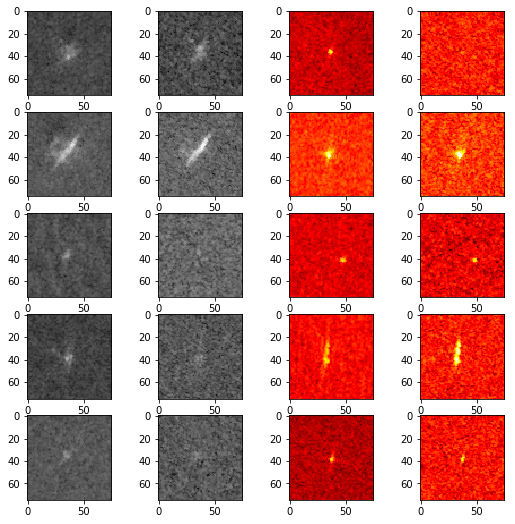

In [6]:
icebergs = train[train.is_iceberg==1].sample(n=5,random_state=123)
ships = train[train.is_iceberg==0].sample(n=5,random_state=123)

# Plot band_1 and band_2, gray for icebergs, hot for not iceberg
fig = plt.figure(1, figsize=(9, 9))
for i in range(5):
    ax = fig.add_subplot(5, 4, 4*i+1)
    arr = np.reshape(np.array(icebergs.iloc[i,0]),(75,75))  # HH
    ax.imshow(arr,cmap='gray', vmin=-39, vmax=21)
    ax = fig.add_subplot(5, 4, 4*i+2)
    arr = np.reshape(np.array(icebergs.iloc[i,1]),(75,75))  # HV
    ax.imshow(arr,cmap='gray', vmin=-39, vmax=-3)
    ax = fig.add_subplot(5, 4, 4*i+3)
    arr = np.reshape(np.array(ships.iloc[i,0]),(75,75))  # HH
    ax.imshow(arr,cmap='hot', vmin=-39, vmax=21)
    ax = fig.add_subplot(5, 4, 4*i+4)
    arr = np.reshape(np.array(ships.iloc[i,1]),(75,75))  # HV
    ax.imshow(arr,cmap='hot', vmin=-39, vmax=-3)
    
fig.savefig('bergs_and_ships.png')